## Part C


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import math
import random
import scipy
import seaborn as sns
import sklearn.manifold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [76]:
df = pd.read_excel("drive/MyDrive/MLDatasets/Dry_Bean_Dataset.xlsx")
# df = df.drop_duplicates()
df = df.dropna()
data = df.to_numpy()

x = df.iloc[::,0:16]
standard_x=StandardScaler().fit_transform(x)
y= df.iloc[::,16::]
x_train,x_test,y_train,y_test = train_test_split(standard_x,y,random_state=10,test_size=0.2,shuffle=True,stratify=y)

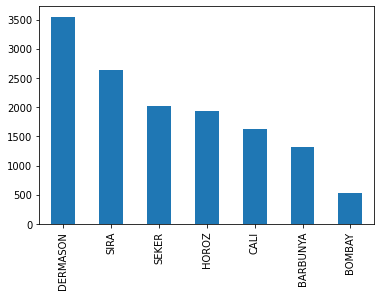

In [ ]:

df.Class.value_counts().plot(kind='bar')


In [ ]:
# print(130.33  + 50.66 + 66.66 +74 +55.33 +75.66 + 29 )
df.shape
# df.info()
print(df.describe())
df.corr()
# print(df.corr())



    # plt.tight_layout()

# plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
# for i in range(0,len(l)):
#     plt.subplot(number_of_rows + 1,number_of_columns,i+1)
#     sn.distplot(df[l[i]],kde=True) 


                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.

Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966722         0.931834         0.951602   
Perimeter        0.966722   1.000000         0.977338         0.913179   
MajorAxisLength  0.931834   0.977338         1.000000         0.826052   
MinorAxisLength  0.951602   0.913179         0.826052         1.000000   
AspectRation     0.241735   0.385276         0.550335        -0.009161   
Eccentricity     0.267481   0.391066         0.541972         0.019574   
ConvexArea       0.999939   0.967689         0.932607         0.951339   
EquivDiameter    0.984968   0.991380         0.961733         0.948539   
Extent           0.054345  -0.021160        -0.078062         0.145957   
Solidity        -0.196585  -0.303970        -0.284302        -0.155831   
roundness       -0.357530  -0.547647        -0.596358        -0.210344   
Compactness     -0.268067  -0.406857        -0.568377        -0.015066   
ShapeFactor1    -0.847958  -0.864623        -0.773609        -0.947204   
ShapeFactor2    -0.639291  -0.767592        -0.859238        -0.471347   
ShapeFactor3    -0.272145  -0.408435        -0.568185        -0.019326   
ShapeFactor4    -0.355721  -0.429310        -0.482527        -0.263749   

                 AspectRation  Eccentricity  ConvexArea  EquivDiameter  \
Area                 0.241735      0.267481    0.999939       0.984968   
Perimeter            0.385276      0.391066    0.967689       0.991380   
MajorAxisLength      0.550335      0.541972    0.932607       0.961733   
MinorAxisLength     -0.009161      0.019574    0.951339       0.948539   
AspectRation         1.000000      0.924293    0.243301       0.303647   
Eccentricity         0.924293      1.000000    0.269255       0.318667   
ConvexArea           0.243301      0.269255    1.000000       0.985226   
EquivDiameter        0.303647      0.318667    0.985226       1.000000   
Extent              -0.370184     -0.319362    0.052564       0.028383   
Solidity            -0.267754     -0.297592   -0.206191      -0.231648   
roundness           -0.766979     -0.722272   -0.362083      -0.435945   
Compactness         -0.987687     -0.970313   -0.269922      -0.327650   
ShapeFactor1         0.024593      0.019920   -0.847950      -0.892741   
ShapeFactor2        -0.837841     -0.860141   -0.640862      -0.713069   
ShapeFactor3        -0.978592     -0.981058   -0.274024      -0.330389   
ShapeFactor4        -0.449264     -0.449354   -0.362049      -0.392512   

                   Extent  Solidity  roundness  Compactness  ShapeFactor1  \
Area             0.054345 -0.196585  -0.357530    -0.268067     -0.847958   
Perimeter       -0.021160 -0.303970  -0.547647    -0.406857     -0.864623   
MajorAxisLength -0.078062 -0.284302  -0.596358    -0.568377     -0.773609   
MinorAxisLength  0.145957 -0.155831  -0.210344    -0.015066     -0.947204   
AspectRation    -0.370184 -0.267754  -0.766979    -0.987687      0.024593   
Eccentricity    -0.319362 -0.297592  -0.722272    -0.970313      0.019920   
ConvexArea       0.052564 -0.206191  -0.362083    -0.269922     -0.847950   
EquivDiameter    0.028383 -0.231648  -0.435945    -0.327650     -0.892741   
Extent           1.000000  0.191389   0.344411     0.354212     -0.141616   
Solidity         0.191389  1.000000   0.607150     0.303766      0.153388   
roundness        0.344411  0.607150   1.000000     0.768086      0.230273   
Compactness      0.354212  0.303766   0.768086     1.000000     -0.009394   
ShapeFactor1    -0.141616  0.153388   0.230273    -0.009394      1.000000   
ShapeFactor2     0.237956  0.343559   0.782824     0.868939      0.469197   
ShapeFactor3     0.347624  0.307662   0.763126     0.998686     -0.008320   
ShapeFactor4     0.148502  0.702163   0.472149     0.484436      0.248619   

                 ShapeFactor2  ShapeFactor3  ShapeFactor4  
Area                -0.639291     -0.272145     -0.355721  
Perimeter           -0.767592     -0.408435     -0.429310  
MajorAxisLeng

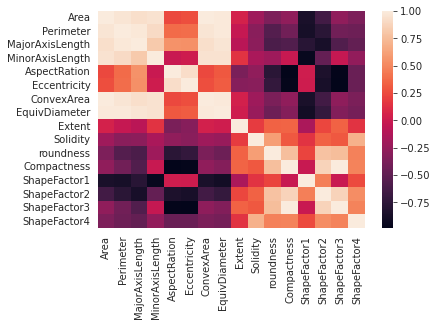

In [ ]:
hm = sn.heatmap(data=df.corr())

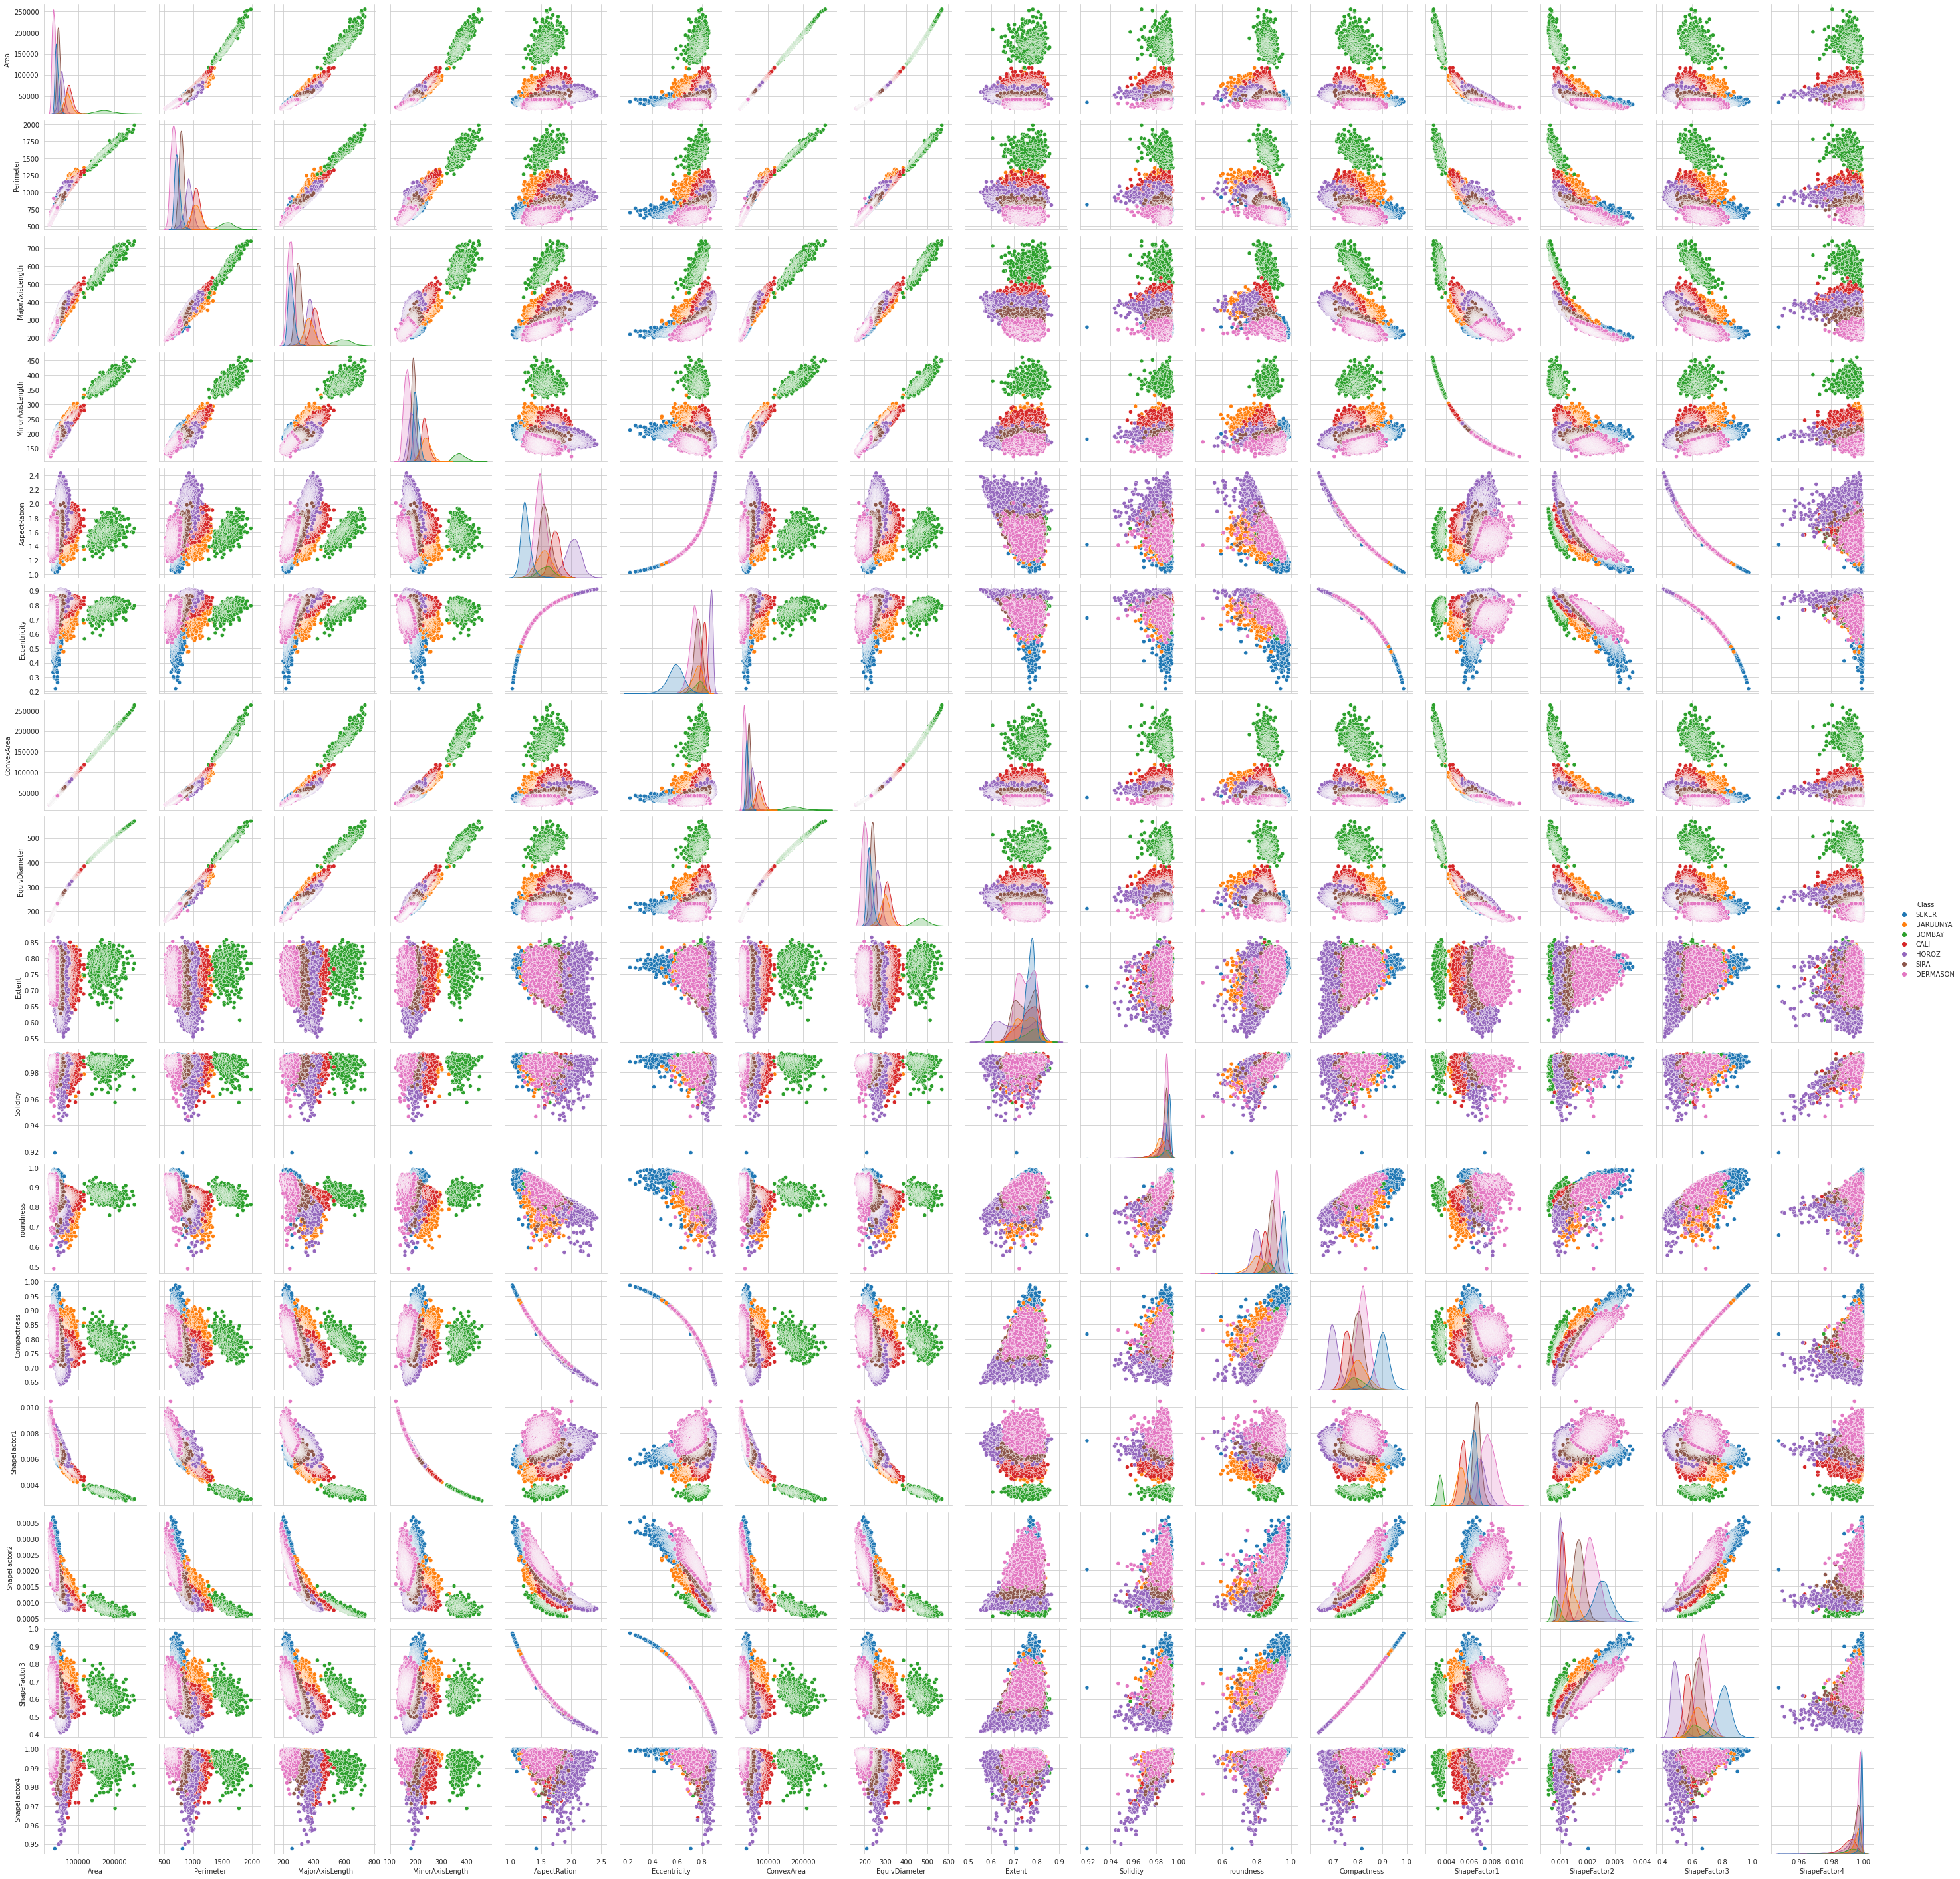

In [ ]:
sn.pairplot(df,hue='Class')

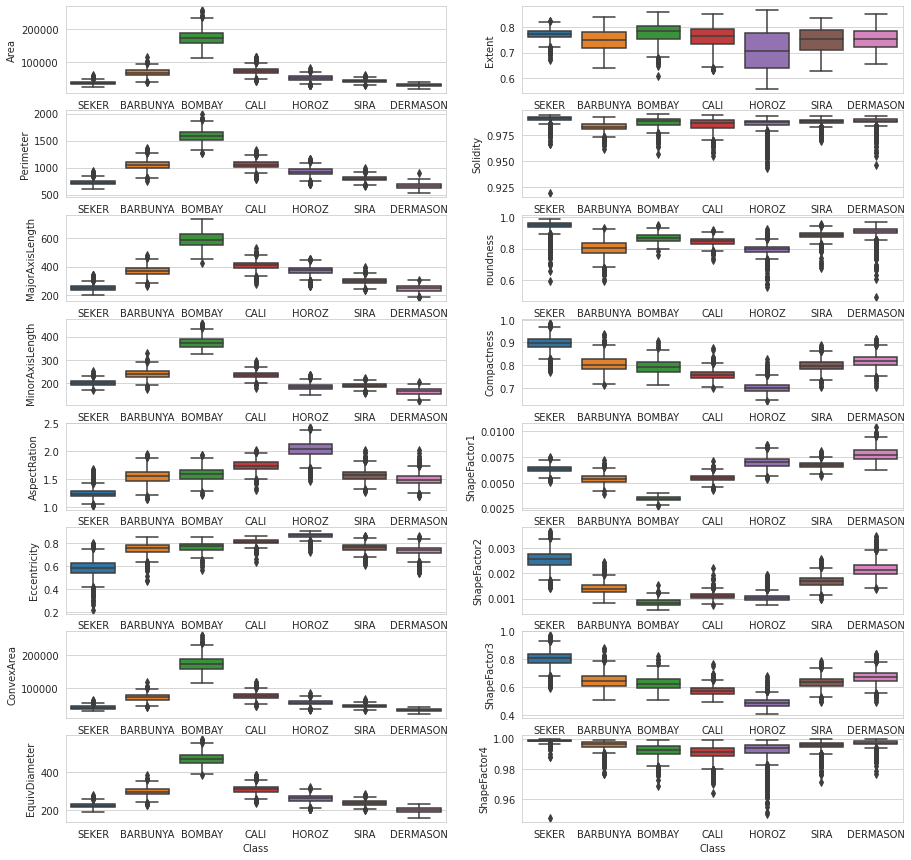

In [68]:
fig, axes = plt.subplots(8, 2, figsize = (15, 15))

sns.boxplot(data=df ,x='Class', y='Area',ax = axes[0,0])
sns.boxplot(data=df ,x='Class', y='Perimeter',ax = axes[1,0])
sns.boxplot(data=df ,x='Class', y='MajorAxisLength',ax = axes[2,0])
sns.boxplot(data=df ,x='Class', y='MinorAxisLength',ax = axes[3,0])
sns.boxplot(data=df ,x='Class', y='AspectRation',ax = axes[4,0])
sns.boxplot(data=df ,x='Class', y='Eccentricity',ax = axes[5,0])
sns.boxplot(data=df ,x='Class', y='ConvexArea',ax = axes[6,0])
sns.boxplot(data=df ,x='Class', y='EquivDiameter',ax = axes[7,0])
sns.boxplot(data=df ,x='Class', y='Extent',ax = axes[0,1])
sns.boxplot(data=df ,x='Class', y='Solidity',ax = axes[1,1])
sns.boxplot(data=df ,x='Class', y='roundness',ax = axes[2,1])
sns.boxplot(data=df ,x='Class', y='Compactness',ax = axes[3,1])
sns.boxplot(data=df ,x='Class', y='ShapeFactor1',ax = axes[4,1])
sns.boxplot(data=df ,x='Class', y='ShapeFactor2',ax = axes[5,1])
sns.boxplot(data=df ,x='Class', y='ShapeFactor3',ax = axes[6,1])
sns.boxplot(data=df ,x='Class', y='ShapeFactor4',ax = axes[7,1])



In [ ]:

tsne = sklearn.manifold.TSNE(n_components=2,perplexity = 40)
# tsne_result = tsne.fit_transform(x)
tsne_result = tsne.fit_transform(standard_x)

tsne_result.shape
tsnedf = df.copy()
tsnedf['tsne1'] = tsne_result[:,0]
tsnedf['tsne2'] = tsne_result[:,1]
tsnedf['label'] = y

# tsnedf = pd.DataFrame({'tsne1': tsne_result[:,0],'tsne2':tsne_result[:,1],'label':y})


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


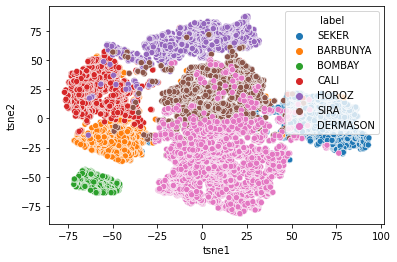

In [ ]:
sn.scatterplot(x=tsnedf['tsne1'],y=tsnedf['tsne2'],hue =tsnedf['label'] )

In [72]:
# encoder = preprocessing.LabelEncoder()
# labels_encoded = encoder.fit_transform(y_train)
model = GaussianNB()
model.fit(x_train,y_train)


# model = BernoulliNB()
# model.fit(x_train,y_train)



predicted = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, predicted))
# print("Precision:",metrics.precision_score(y_test,predicted,average='macro'))
print("Precision:",metrics.precision_score(y_test,predicted,average='micro'))
# print("Precision:",metrics.precision_score(y_test,predicted,average='weighted'))
# print("Precision:",metrics.precision_score(y_test,predicted,average=None))
print("Recall:",metrics.recall_score(y_test,predicted,average='micro'))


Accuracy: 0.892398090341535
Precision: 0.892398090341535
Recall: 0.892398090341535


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model = BernoulliNB()
model.fit(x_train,y_train)



predicted = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, predicted))
# print("Precision:",metrics.precision_score(y_test,predicted,average='macro'))
print("Precision:",metrics.precision_score(y_test,predicted,average='micro'))
# print("Precision:",metrics.precision_score(y_test,predicted,average='weighted'))
# print("Precision:",metrics.precision_score(y_test,predicted,average=None))
print("Recall:",metrics.recall_score(y_test,predicted,average='micro'))


Accuracy: 0.714654854189738
Precision: 0.714654854189738
Recall: 0.714654854189738


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 PCA 

In [88]:
num_components =12

pca = PCA(n_components=num_components)
principalComponents = pca.fit(x_train)
# pcadf = df.copy()
# pcadf['principal1'] = principalComponents[:,0]
# pcadf['principal2'] = principalComponents[:,1]
# pcadf['label'] = y

pcadf = pca.transform(x_train)
# print(pcadf)
new_x_test = pca.transform(x_test)
# pcadf['label']=y_train
#Using Gaussian NB
# print(type(pcadf))
# print(pcadf.shape)
# print(y_train.shape)
# y_train.shape()
temp_y_train = np.ravel(y_train)

pcamodel = GaussianNB()
pcamodel.fit(pcadf,temp_y_train)

predicted = pcamodel.predict(new_x_test)
print("Accuracy:",metrics.accuracy_score(y_test, predicted))
# print("Precision:",metrics.precision_score(y_test,predicted,average='macro'))
print("Precision:",metrics.precision_score(y_test,predicted,average='micro'))
# print("Precision:",metrics.precision_score(y_test,predicted,average='weighted'))
# print("Precision:",metrics.precision_score(y_test,predicted,average=None))
print("Recall:",metrics.recall_score(y_test,predicted,average='micro'))
print("F1-Score:", metrics.f1_score(y_test,predicted,average='micro'))
'''
Accuracy: 0.892398090341535
Precision: 0.8939074785714288
Recall: 0.892398090341535
F1-Score: 0.8927584960694227
'''


Accuracy: 0.8780756518545721
Precision: 0.8780756518545721
Recall: 0.8780756518545721
F1-Score: 0.8780756518545721


'\nAccuracy: 0.892398090341535\nPrecision: 0.8939074785714288\nRecall: 0.892398090341535\nF1-Score: 0.8927584960694227\n'

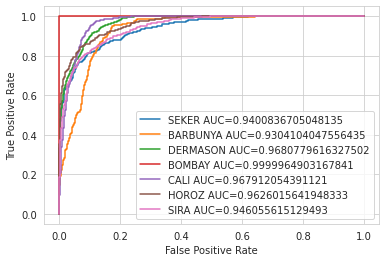

In [69]:
# print(df.size)
# print(df.loc[5005,'Class'])
# df.loc[df['Class']=='SEKER','Class']=1
# df.loc[df['Class']!='SEKER','Class']=0



def roc_curve_creation(CLASS):
  df = pd.read_excel("drive/MyDrive/MLDatasets/Dry_Bean_Dataset.xlsx")
  df['Class']= np.where(df['Class']==CLASS,1,df['Class'])
  df['Class']= np.where((df['Class']!=CLASS) &(df['Class']!=1) ,0,df['Class'])

# print(df['Class'])
  x_roc = df.iloc[::,0:16]
  # standard_x=StandardScaler().fit_transform(x_roc)
  y= df.iloc[::,16::]


  x_train,x_test,y_train,y_test = train_test_split(x_roc,y,random_state=100,test_size=0.2,shuffle=True)
  y_train = np.ravel(y_train)
  y_train = list(y_train)
# print(y_train)
  model = GaussianNB()
  model.fit(x_train,y_train)
  predicted = model.predict(x_test)



  predicted_proba = model.predict_proba(x_test)[::,1]


  y_test = y_test.to_numpy()
  y_test = y_test.astype(int)
  # print(type(predicted),type(y_test))

  fpr, tpr, _ = roc_curve(y_test, predicted_proba)
  auc = metrics.roc_auc_score(y_test, predicted_proba)
  # print(auc)
  plt.plot(fpr,tpr,label= CLASS+" AUC="+str(auc))


roc_curve_creation("SEKER")
roc_curve_creation("BARBUNYA")
roc_curve_creation("DERMASON")
roc_curve_creation("BOMBAY")
roc_curve_creation("CALI")
roc_curve_creation("HOROZ")
roc_curve_creation("SIRA")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()


# plt.plot([0, 1], [0, 1], color = 'g')

In [93]:
logisticmodel = LogisticRegression(max_iter=300,tol=1e-4,multi_class='multinomial')
logisticmodel.fit(x_train,np.ravel(y_train))
predicted =logisticmodel.predict(x_test)


# y_test = np.ravel(y_test)
print("Accuracy:",metrics.accuracy_score(y_test, predicted))
# print("Precision:",metrics.precision_score(y_test,predicted,average='macro'))
print("Precision:",metrics.precision_score(y_test,predicted,average='weighted'))
# print("Precision:",metrics.precision_score(y_test,predicted,average='weighted'))
# print("Precision:",metrics.precision_score(y_test,predicted,average=None))
print("Recall:",metrics.recall_score(y_test,predicted,average='weighted'))
print("F1-Score:", metrics.f1_score(y_test,predicted,average='weighted'))

Accuracy: 0.9177377892030848
Precision: 0.9186467297450728
Recall: 0.9177377892030848
F1-Score: 0.918034010661041


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
